# Project Investigate a Dataset

I choose baseball dataset.

## Phase Simple EDA

Before Before defining the question, I did a simple data search and understood the data set.

In [3]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# load csv(datasets)

# teams = pd.read_csv("/Users/Akihiro/Downloads/baseballdatabank-2017.1/core/Teams.csv")
salaries = pd.read_csv("/Users/Akihiro/Downloads/baseballdatabank-2017.1/core/Salaries.csv")
# batting = pd.read_csv("/Users/Akihiro/Downloads/baseballdatabank-2017.1/core/Batting.csv")
pitching = pd.read_csv("/Users/Akihiro/Downloads/baseballdatabank-2017.1/core/Pitching.csv")
# players = pd.read_csv("/Users/Akihiro/Downloads/baseballdatabank-2017.1/core/Master.csv")


In [5]:
salaries.sample(5)

,yearID,teamID,lgID,playerID,salary
5569,1992,TEX,AL,ryanno01,4200000
17159,2005,SLN,NL,florera01,320000
26074,2016,NYM,NL,familje01,4100000
25597,2016,ARI,NL,segurje01,2600000
7755,1995,DET,AL,whitalo01,3783334


In [6]:
pitching.sample(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
40159,mortecl01,2010,1,OAK,AL,0,0,1,1,0,...,0.0,0.0,0.0,0,26.0,0.0,4,0.0,0.0,0.0
42547,warread01,2013,1,NYA,AL,3,2,34,2,0,...,2.0,3.0,2.0,0,331.0,17.0,29,0.0,0.0,10.0
3893,krohru01,1908,1,CHN,NL,0,0,2,1,0,...,NaN,1.0,0.0,0,49.0,1.0,3,NaN,NaN,NaN
39147,colonro01,2009,1,KCA,AL,2,3,43,0,0,...,1.0,1.0,2.0,2,220.0,13.0,27,1.0,0.0,4.0
36124,smallaa01,2004,1,FLO,NL,0,0,7,0,0,...,0.0,1.0,0.0,0,78.0,0.0,15,1.0,0.0,1.0


In [7]:
salaries.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [8]:
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,...,30388.000000,44830.000000,44405.000000,44963.000000,44724.000000,44830.000000,44963.000000,12063.000000,12063.000000,12061.000000
mean,1968.670062,1.079643,4.715744,4.715722,23.681761,9.485488,3.151035,0.448591,1.504793,253.872139,...,2.411379,2.528575,2.266096,0.301604,343.312181,6.345260,43.021773,2.141922,1.878388,5.322610
std,37.569499,0.284834,5.813410,4.988846,18.493488,12.283920,7.081844,1.109742,4.991518,257.330446,...,2.772648,3.425706,2.998881,0.755523,348.758261,9.993949,43.245812,2.710191,2.121352,5.990178
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1941.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,11.000000,0.000000,0.000000,1.000000
50%,1978.000000,1.000000,2.000000,3.000000,21.000000,3.000000,0.000000,0.000000,0.000000,167.000000,...,2.000000,1.000000,1.000000,0.000000,227.000000,3.000000,28.000000,1.000000,1.000000,3.000000
75%,2001.000000,1.000000,7.000000,8.000000,35.000000,17.000000,3.000000,0.000000,1.000000,393.000000,...,4.000000,4.000000,3.000000,0.000000,535.000000,8.000000,67.000000,3.000000,3.000000,8.000000
max,2016.000000,4.000000,59.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,...,23.000000,63.000000,41.000000,16.000000,2906.000000,84.000000,519.000000,21.000000,14.000000,40.000000


### Try merge

In [9]:
data = salaries.merge(pitching)

In [10]:
data[data.playerID == "gomezje01"]

,yearID,teamID,lgID,playerID,salary,stint,W,L,G,GS,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
10025,2012,CLE,AL,gomezje01,482700,1,5,8,20,17,...,5.0,2.0,4.0,0,395.0,1.0,66,2.0,7.0,11.0
10608,2013,PIT,NL,gomezje01,500000,1,3,0,34,8,...,3.0,6.0,3.0,0,333.0,6.0,35,4.0,6.0,9.0
11001,2014,PIT,NL,gomezje01,514500,1,2,2,44,0,...,7.0,2.0,2.0,0,270.0,20.0,24,3.0,2.0,7.0
11405,2015,PHI,NL,gomezje01,800000,1,2,3,65,0,...,4.0,3.0,2.0,0,319.0,21.0,28,1.0,4.0,6.0
11729,2016,PHI,NL,gomezje01,1400000,1,3,5,70,0,...,2.0,3.0,2.0,0,297.0,59.0,38,0.0,3.0,10.0


In [11]:
salaries.shape

(26428, 5)

In [12]:
pitching.shape

(44963, 30)

In [13]:
data.shape

(11797, 31)

## About Datasets

>The updated version of the database contains complete batting and pitching statistics from 1871 to 2016, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please read the documentation.

`from`
http://seanlahman.com/files/database/readme2016.txt

### Pitching Table

```
playerID       Player ID code
yearID         Year
stint          player's stint (order of appearances within a season)
teamID         Team
lgID           League
W              Wins
L              Losses
G              Games
GS             Games Started
CG             Complete Games 
SHO            Shutouts
SV             Saves
IPOuts         Outs Pitched (innings pitched x 3)
H              Hits
ER             Earned Runs
HR             Homeruns
BB             Walks
SO             Strikeouts
BAOpp          Opponent's Batting Average
ERA            Earned Run Average
IBB            Intentional Walks
WP             Wild Pitches
HBP            Batters Hit By Pitch
BK             Balks
BFP            Batters faced by Pitcher
GF             Games Finished
R              Runs Allowed
SH             Sacrifices by opposing batters
SF             Sacrifice flies by opposing batters
GIDP           Grounded into double plays by opposing batter
```


## Question

What are the characteristics of baseball players with the highest salaries?
- Pitcher 

## Data Cleaning

merging multiple files and handling missing values

In [14]:
## handling missing values
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [15]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44963 entries, 0 to 44962
Data columns (total 30 columns):
playerID    44963 non-null object
yearID      44963 non-null int64
stint       44963 non-null int64
teamID      44963 non-null object
lgID        44832 non-null object
W           44963 non-null int64
L           44963 non-null int64
G           44963 non-null int64
GS          44963 non-null int64
CG          44963 non-null int64
SHO         44963 non-null int64
SV          44963 non-null int64
IPouts      44963 non-null int64
H           44963 non-null int64
ER          44963 non-null int64
HR          44963 non-null int64
BB          44963 non-null int64
SO          44963 non-null int64
BAOpp       43437 non-null float64
ERA         44874 non-null float64
IBB         30388 non-null float64
WP          44830 non-null float64
HBP         44405 non-null float64
BK          44963 non-null int64
BFP         44724 non-null float64
GF          44830 non-null float64
R           4496

The reason for deleting a row is that in the case of row deletion, about 30,000 pieces of data are lost.
CS,SO,SH,SF,GIDP 

In [16]:
drop_col = ["IBB","SH","SF","GIDP"]
pitching = pitching.drop(drop_col, axis=1)

In [17]:
pitching.shape

(44963, 26)

In [18]:
pitching = pitching.dropna()

In [19]:
pitching.shape

(43104, 26)

In [20]:
##  merging multiple files

In [21]:
salaries[salaries.playerID == "bailean01"].sort_values(by="yearID") 

,yearID,teamID,lgID,playerID,salary
20321,2009,OAK,AL,bailean01,400000
21145,2010,OAK,AL,bailean01,435000
21978,2011,OAK,AL,bailean01,465000
22381,2012,BOS,AL,bailean01,3900000
23225,2013,BOS,AL,bailean01,4100000


In [22]:
pitching[pitching.W==24].tail(30)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BB,SO,BAOpp,ERA,WP,HBP,BK,BFP,GF,R
9194,gomezle01,1932,1,NYA,AL,24,7,37,31,21,...,105,176,0.250,4.21,0.0,2.0,0,1149.0,3.0,140
9371,crowdal01,1933,1,WS1,AL,24,15,52,35,17,...,81,110,0.260,3.97,2.0,3.0,0,1268.0,10.0,140
9400,grovele01,1933,1,PHA,AL,24,8,45,28,21,...,83,114,0.260,3.20,1.0,4.0,0,1173.0,16.0,113
9695,rowesc01,1934,1,DET,AL,24,8,45,30,20,...,81,149,0.250,3.45,1.0,1.0,0,1111.0,13.0,110
10014,deandi01,1936,1,SLN,NL,24,13,51,34,28,...,53,195,0.250,3.17,4.0,3.0,0,1303.0,17.0,128
10702,fellebo01,1939,1,CLE,AL,24,9,39,35,24,...,142,246,0.210,2.85,14.0,3.0,1,1243.0,3.0,105
13059,sainjo01,1948,1,BSN,NL,24,15,42,39,28,...,83,137,0.240,2.60,2.0,5.0,0,1313.0,3.0,105
14050,shantbo01,1952,1,PHA,AL,24,7,33,33,27,...,63,152,0.220,2.48,0.0,4.0,0,1103.0,0.0,87
16747,sanfoja02,1962,1,SFN,NL,24,7,39,38,13,...,92,147,0.230,3.43,4.0,3.0,2,1100.0,1.0,110
16905,fordwh01,1963,1,NYA,AL,24,7,38,37,13,...,56,189,0.240,2.74,9.0,2.0,0,1068.0,1.0,94


In [23]:
pitching[pitching.playerID == "johnsra05"].sort_values(by="yearID") 

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BB,SO,BAOpp,ERA,WP,HBP,BK,BFP,GF,R
26545,johnsra05,1988,1,MON,NL,3,0,4,4,1,...,7,25,0.220,2.42,3.0,0.0,0,109.0,0.0,8
27026,johnsra05,1989,1,MON,NL,0,4,7,6,0,...,26,26,0.260,6.67,2.0,0.0,2,143.0,1.0,25
27027,johnsra05,1989,2,SEA,AL,7,9,22,22,2,...,70,104,0.240,4.40,5.0,3.0,5,572.0,0.0,75
27523,johnsra05,1990,1,SEA,AL,14,11,33,33,5,...,120,194,0.210,3.65,4.0,5.0,2,944.0,0.0,103
28054,johnsra05,1991,1,SEA,AL,13,10,33,33,2,...,152,228,0.210,3.98,12.0,12.0,2,889.0,0.0,96
28536,johnsra05,1992,1,SEA,AL,12,14,31,31,6,...,144,241,0.200,3.77,13.0,18.0,1,922.0,0.0,104
29043,johnsra05,1993,1,SEA,AL,19,8,35,34,10,...,99,308,0.200,3.24,8.0,16.0,2,1043.0,1.0,97
29570,johnsra05,1994,1,SEA,AL,13,6,23,23,9,...,72,204,0.200,3.19,5.0,6.0,0,694.0,0.0,65
30113,johnsra05,1995,1,SEA,AL,18,2,30,30,6,...,65,294,0.190,2.48,5.0,6.0,2,866.0,0.0,65
30702,johnsra05,1996,1,SEA,AL,5,0,14,8,0,...,25,85,0.180,3.67,3.0,2.0,1,256.0,2.0,27


In [24]:
pitchers_salaries = salaries.merge(pitching)

In [25]:
pitchers_salaries.shape

(11334, 27)

In [26]:
pitchers_salaries[pitchers_salaries.playerID == "johnsra05"].sort_values(by="yearID") 

,yearID,teamID,lgID,playerID,salary,stint,W,L,G,GS,...,BB,SO,BAOpp,ERA,WP,HBP,BK,BFP,GF,R
1216,1989,MON,NL,johnsra05,70000,1,0,4,7,6,...,26,26,0.260,6.67,2.0,0.0,2,143.0,1.0,25
1639,1990,SEA,AL,johnsra05,150000,1,14,11,33,33,...,120,194,0.210,3.65,4.0,5.0,2,944.0,0.0,103
1949,1991,SEA,AL,johnsra05,350000,1,13,10,33,33,...,152,228,0.210,3.98,12.0,12.0,2,889.0,0.0,96
2265,1992,SEA,AL,johnsra05,1392500,1,12,14,31,31,...,144,241,0.200,3.77,13.0,18.0,1,922.0,0.0,104
2660,1993,SEA,AL,johnsra05,2625000,1,19,8,35,34,...,99,308,0.200,3.24,8.0,16.0,2,1043.0,1.0,97
3051,1994,SEA,AL,johnsra05,3325000,1,13,6,23,23,...,72,204,0.200,3.19,5.0,6.0,0,694.0,0.0,65
3483,1995,SEA,AL,johnsra05,4675000,1,18,2,30,30,...,65,294,0.190,2.48,5.0,6.0,2,866.0,0.0,65
3913,1996,SEA,AL,johnsra05,6025000,1,5,0,14,8,...,25,85,0.180,3.67,3.0,2.0,1,256.0,2.0,27
4328,1997,SEA,AL,johnsra05,6325000,1,20,4,30,29,...,77,291,0.190,2.28,4.0,10.0,0,850.0,0.0,60
4423,1999,ARI,NL,johnsra05,9700000,1,17,9,35,35,...,70,364,0.000,2.48,4.0,9.0,2,1079.0,0.0,86


### why merging salaires and pittching data have decreased

- How the merge works in the first place

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

>Merge DataFrame objects by performing a database-style join operation by columns or indexes.
>If joining columns on columns, the DataFrame indexes will be ignored. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on.

## Data Investigate

(array([  7.99500000e+03,   1.33000000e+03,   7.42000000e+02,
          4.05000000e+02,   2.67000000e+02,   1.46000000e+02,
          1.45000000e+02,   1.12000000e+02,   4.40000000e+01,
          6.20000000e+01,   1.90000000e+01,   2.10000000e+01,
          2.00000000e+01,   6.00000000e+00,   9.00000000e+00,
          6.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00]),
 array([    60000.,   1685550.,   3311100.,   4936650.,   6562200.,
          8187750.,   9813300.,  11438850.,  13064400.,  14689950.,
         16315500.,  17941050.,  19566600.,  21192150.,  22817700.,
         24443250.,  26068800.,  27694350.,  29319900.,  30945450.,
         32571000.]),
 <a list of 20 Patch objects>)

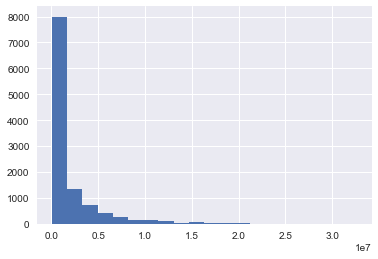

In [28]:
plt.hist(pitchers_salaries.salary,bins=20)

First of all, let's check the distribution of salary.

As you can see from the histogram, most players are located between 60000 $ and 1685550 $.
Furthermore, if we visualize the interval with a histogram, it will look like the figure below.

(array([   0.,  189.,   70.,   40.,   34.,  491.,  182.,  141.,  114.,
          79.,  208.,   83.,   96.,  102.]),
 array([ 50000,  60000,  70000,  80000,  90000, 100000, 110000, 120000,
        130000, 140000, 150000, 160000, 170000, 180000, 190000]),
 <a list of 14 Patch objects>)

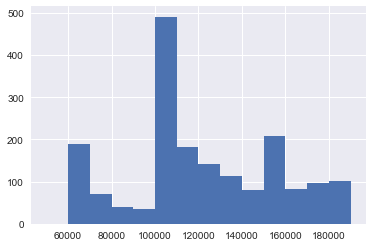

In [29]:
plt.hist(pitchers_salaries.salary,bins=range(50000, 200000,10000))

In [27]:
#correlation
pitchers_salaries.corr().sort_values('salary',ascending=False)

,yearID,salary,stint,W,L,G,GS,CG,SHO,SV,...,BB,SO,BAOpp,ERA,WP,HBP,BK,BFP,GF,R
salary,0.336969,1.000000,-0.023909,0.267537,0.219364,-0.015962,0.284594,0.081975,0.103416,0.083528,...,0.149302,0.324400,-0.006881,-0.075675,0.103387,0.216857,-0.043210,0.259265,-0.027216,0.224919
yearID,1.000000,0.336969,-0.047346,-0.076950,-0.090441,0.068313,-0.060164,-0.259951,-0.164456,-0.003072,...,-0.147444,0.026817,0.048255,0.005757,-0.045031,0.085561,-0.247604,-0.103343,-0.017529,-0.104381
SO,0.026817,0.324400,-0.057788,0.855790,0.716650,0.223466,0.806690,0.552318,0.495824,-0.010587,...,0.800465,1.000000,-0.179359,-0.265657,0.574677,0.585919,0.259353,0.898133,-0.120462,0.776643
GS,-0.060164,0.284594,-0.041937,0.831671,0.820244,-0.189899,1.000000,0.585674,0.504396,-0.268022,...,0.812341,0.806690,-0.018738,-0.107543,0.497577,0.600566,0.293170,0.931605,-0.478169,0.917523
W,-0.076950,0.267537,-0.050635,1.000000,0.669684,0.139293,0.831671,0.601943,0.539693,-0.103394,...,0.760597,0.855790,-0.131856,-0.238378,0.489564,0.553635,0.275775,0.898831,-0.209312,0.782713
IPouts,-0.099976,0.266204,-0.059044,0.909407,0.836447,0.145777,0.925365,0.633774,0.538946,-0.108809,...,0.865877,0.908931,-0.114004,-0.239886,0.560178,0.627101,0.318624,0.997790,-0.231712,0.921908
BFP,-0.103343,0.259265,-0.060211,0.898831,0.852157,0.135937,0.931605,0.619749,0.522647,-0.120942,...,0.883473,0.898133,-0.099964,-0.223850,0.570065,0.639531,0.319274,1.000000,-0.243325,0.941927
H,-0.101024,0.253914,-0.059547,0.857962,0.866639,0.085846,0.933202,0.586687,0.482180,-0.157483,...,0.841444,0.832338,-0.033671,-0.175802,0.534115,0.624108,0.300299,0.982522,-0.282647,0.967757
HR,-0.027015,0.249196,-0.055610,0.727629,0.790872,0.024744,0.842329,0.453974,0.354491,-0.165550,...,0.744975,0.733751,-0.041031,-0.098414,0.445897,0.569087,0.229019,0.855686,-0.288166,0.902928
ER,-0.091928,0.230963,-0.060336,0.779677,0.881676,0.029188,0.915552,0.515157,0.408687,-0.196502,...,0.859719,0.774278,-0.012690,-0.089730,0.544554,0.636586,0.284980,0.936949,-0.322629,0.996199


The striking of the highest correlation was strikeout.
In the starting pitcher and the relay pitcher, although the average number of times is different, it can not be said unconditionally, but striking is said to be the most valuable out. That is because striking out does not need to consider defensive errors and the like.

From the above point of view, it seems that the correlation appears correctly.

The next highest correlation was the number of starting times.
In MLB, the starting pitcher is higher than the relay pitcher because the wage is high, which means that this is also a good result.

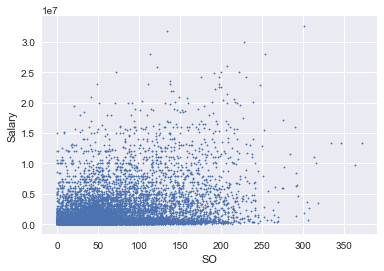

In [30]:
plt.ylabel("Salary")
plt.xlabel("SO")
plt.scatter(pitchers_salaries.SO,pitchers_salaries.salary,s=2)

Confirm the relation of variables confirmed by correlation again with histogram and scatter chart.
In the scatter plot, players with high salaries seem to have a high strikeout rate, but it is a bit confusing, so check back in the histogram again.

<Container object of 11334 artists>

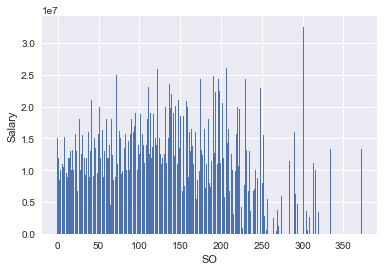

In [34]:
plt.ylabel("Salary")
plt.xlabel("SO")
plt.bar(pitchers_salaries.SO,pitchers_salaries.salary)

As you can see in the histogram you can check the correlation between strikeout and salary. Despite striking out 300, salary is low, old data may also be mixed. This consideration comes from the fact that the average salary increases yearly.

http://www.businessinsider.com/mlb-average-highest-paid-salary-2017-4

<Container object of 11334 artists>

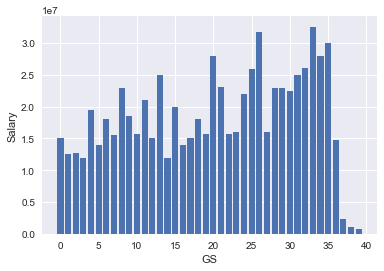

In [32]:
plt.ylabel("Salary")
plt.xlabel("GS")
plt.bar(pitchers_salaries.GS,pitchers_salaries.salary)

Let's check the starting number and the bar chart of salary again.
Looking at the bar graph, it seems that correlation is well visualized.

It is because the salary who has over 36 games is low in salary is old salary and salary was low at that time.
The pitcher interval of the old pitcher was very short. If it is a modern athlete, it is rare to start more than 36 games.

https://www.baseball-reference.com/leagues/MLB/2008-pitching-leaders.shtml
https://www.baseball-reference.com/leagues/MLB/2016-pitching-leaders.shtml

## Conclusions Phase
It was found that the strikeout number and the number of departures are more related to salary than the indicators that have been valued so far, such as the defense ratio and the number of victories.
